In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import linear_model

#### Creo dataset sintetico 
utilizzando una funzione che mi genererá dei numeri casuali fra 0 e 60 che costruira il mio dataset

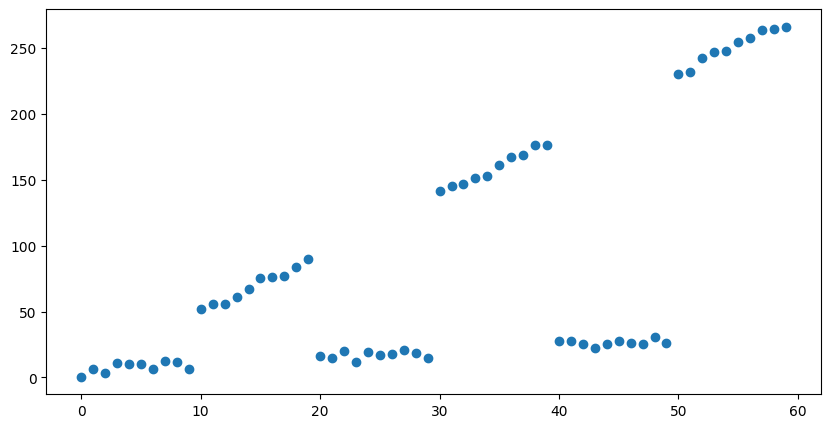

In [2]:
x = np.arange(0, 60)
y = list(map(lambda x: x / 2 + ((x // 10) % 2) * 4 * x + np.random.random() * 10, x))
x = pd.DataFrame({'x': x})
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.show()

#### instanzio un regressore lineare e come possiamo notare dall'illustrazione produce dei residui molto alti

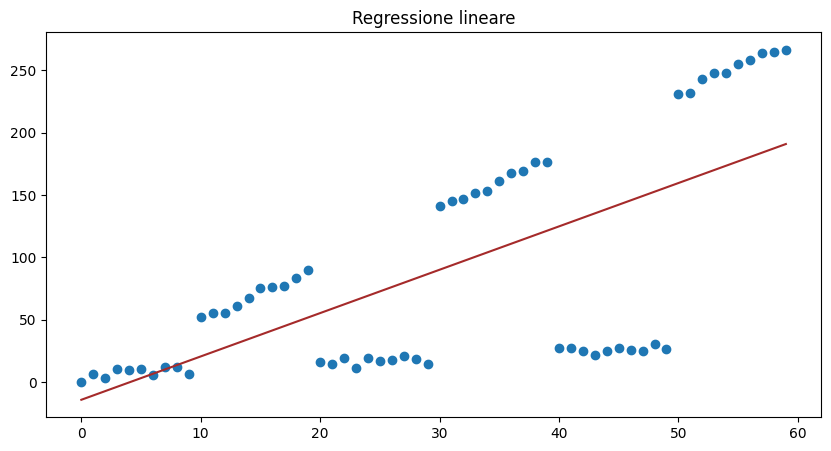

In [17]:
linear_regressor = linear_model.LinearRegression()

linear_regressor.fit(x, y)

linear_predictions = linear_regressor.predict(x)
plt.figure(figsize=(10, 5))
plt.title("Regressione lineare")
plt.scatter(x, y)
plt.plot(x, linear_predictions, color='brown')
plt.show()

#### Come possiamo vedere i pallini blu rappresentano i valori di uscita effettivi 
#### i punti marroni rappresentano quanto discosta la nostra linea dai valori reali a quelli predetti 
questo e un modello lineare utilizzato su un dataset non lineare 

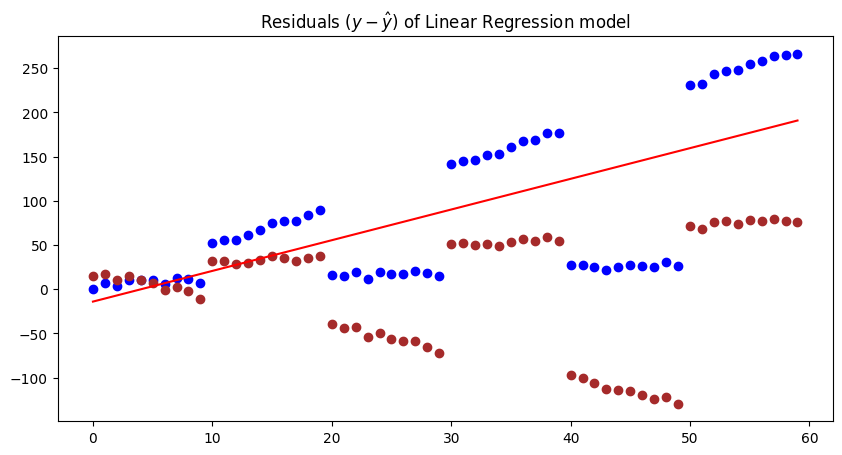

In [4]:
plt.figure(figsize=(10, 5))
plt.title("Residuals $(y - \hat{y})$ of Linear Regression model")
plt.plot(x, linear_predictions, color='red')
plt.scatter(x, y, color='blue')
plt.scatter(x, y - linear_predictions, color='brown')
plt.show()

#### Adesso utilizzo un albero (random forest) con massima profondita 1 
e ottengo una regressione non lineare ma non precisa 

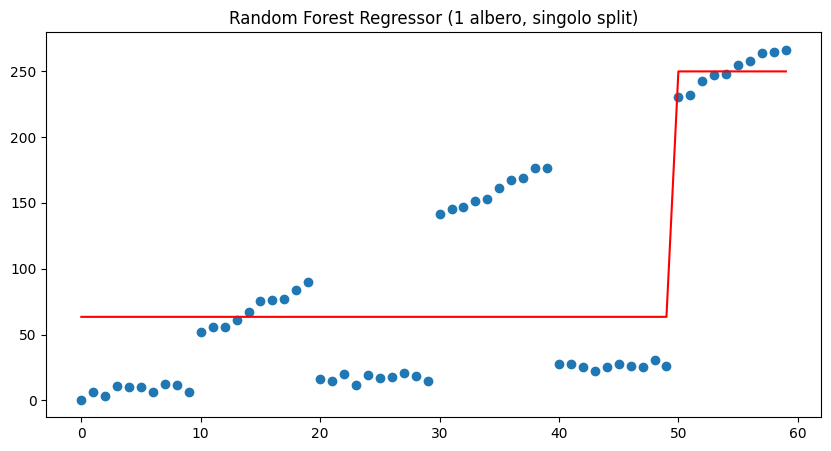

In [5]:
rf_regressor = ensemble.RandomForestRegressor(
    n_estimators=1, 
    max_depth=1, 
    random_state=0
)
rf_regressor.fit(x, y)
rf_predictions = rf_regressor.predict(x)


plt.figure(figsize=(10, 5))
plt.title('Random Forest Regressor (1 albero, singolo split)')
plt.scatter(x, y)
plt.plot(x, rf_predictions, color='r')
plt.show()

#### Prova con 2 alberi (Random Forest)

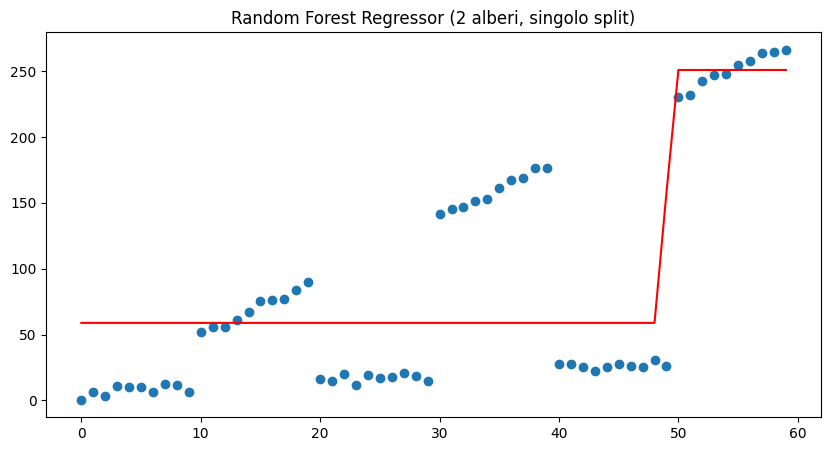

In [6]:
rf_regressor = ensemble.RandomForestRegressor(
    n_estimators=2, 
    max_depth=1, 
    random_state=0
)
rf_regressor.fit(x, y)
rf_predictions = rf_regressor.predict(x)


plt.figure(figsize=(10, 5))
plt.title('Random Forest Regressor (2 alberi, singolo split)')
plt.scatter(x, y)
plt.plot(x, rf_predictions, color='r')
plt.show()

#### Prova con 5 - 10 - 20 - 50 alberi (Random Forest) sempre con profondita 1

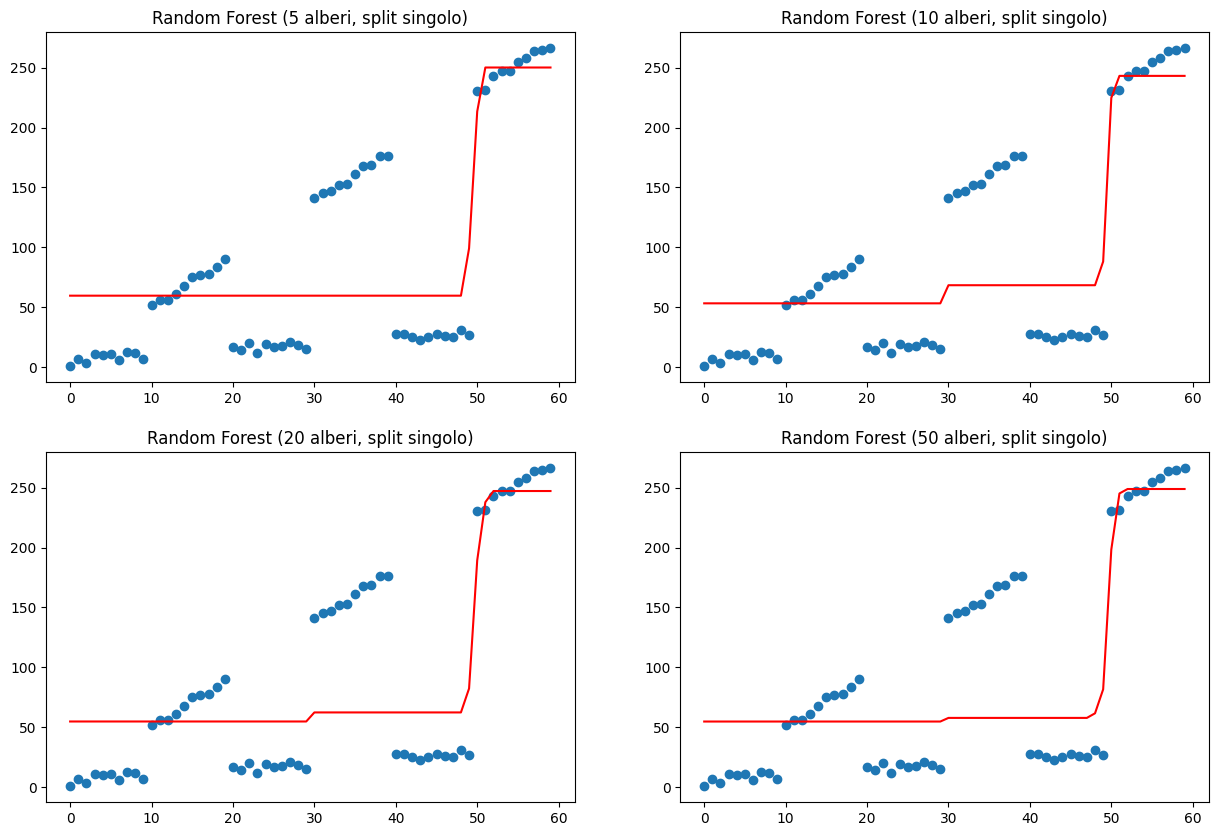

In [7]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))

for idx, n_estimators in enumerate([5, 10, 20, 50]):
    
    rf_regressor = ensemble.RandomForestRegressor(
        n_estimators=n_estimators, 
        max_depth=1, 
        random_state=0
    )

    rf_regressor.fit(x, y)
    subplot = ax[idx // 2][idx % 2]
    subplot.set_title('Random Forest ({} alberi, split singolo)'.format(n_estimators))
    subplot.scatter(x, y)
    rf_predictions = rf_regressor.predict(x)
    subplot.plot(x, rf_predictions, color='r')
plt.show()

#### Prova con 5 - 10 - 20 - 50 alberi (Random Forest) sempre con profondita 2

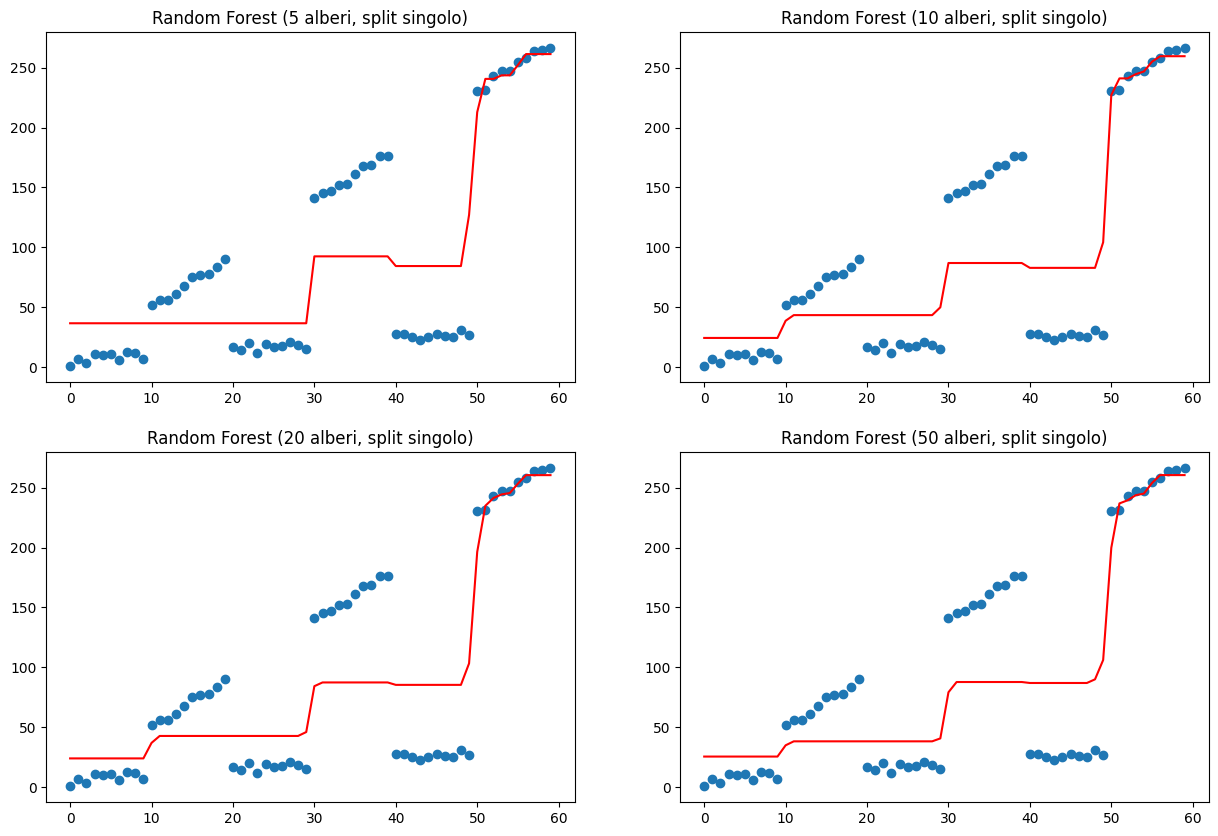

In [8]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))

for idx, n_estimators in enumerate([5, 10, 20, 50]):
    
    rf_regressor = ensemble.RandomForestRegressor(
        n_estimators=n_estimators, 
        max_depth=2, 
        random_state=0
    )

    rf_regressor.fit(x, y)
    subplot = ax[idx // 2][idx % 2]
    subplot.set_title('Random Forest ({} alberi, split singolo)'.format(n_estimators))
    subplot.scatter(x, y)
    rf_predictions = rf_regressor.predict(x)
    subplot.plot(x, rf_predictions, color='r')
plt.show()

#### Adesso utilizzo un Gradient Boosting con 1 estimatore

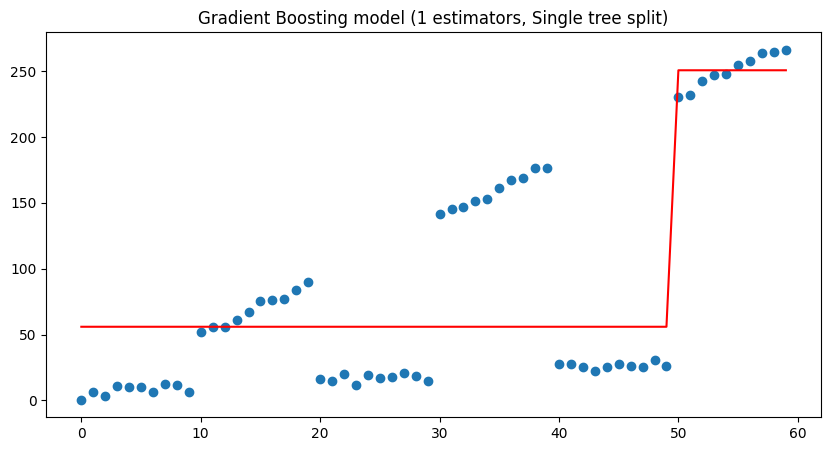

In [12]:
params = {
    'n_estimators': 1,
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'friedman_mse'
}

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

gradient_boosting_regressor.fit(x, y)

gb_predictions = gradient_boosting_regressor.predict(x)

plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(x, y)
plt.plot(x, gb_predictions, color='r')
plt.show()

#### Visualizzo il discostamento dai valori reali e i valori predetti

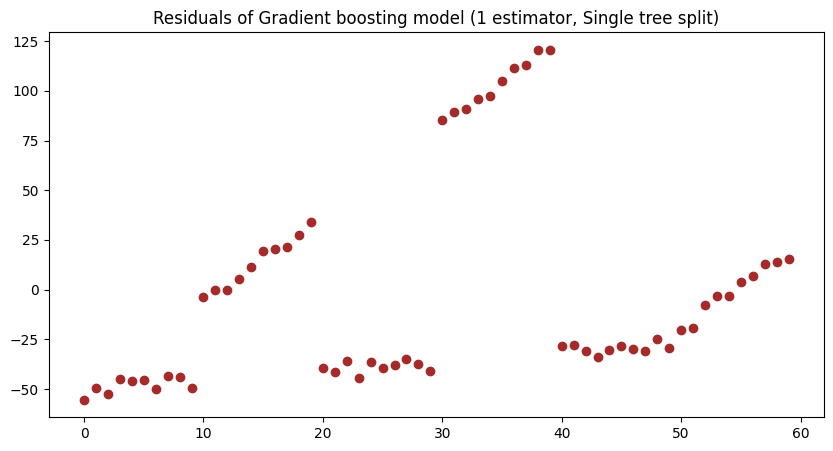

In [13]:
plt.figure(figsize=(10, 5))
plt.title('Residuals of Gradient boosting model (1 estimator, Single tree split)')
plt.scatter(x, y - gb_predictions, color='brown')
plt.show()

#### Adesso utilizzo un Gradient Boosting con 2 estimatore

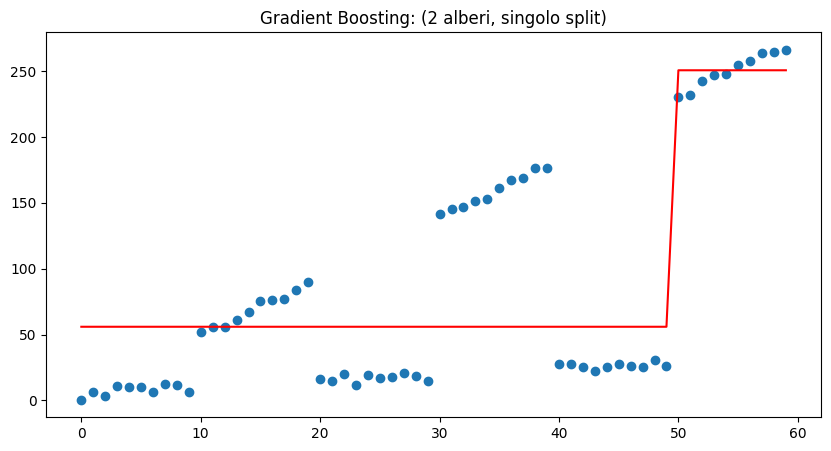

In [14]:
params['n_estimators'] = 2

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

gradient_boosting_regressor.fit(x, y)

plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting: (2 alberi, singolo split)')
plt.scatter(x, y)
plt.plot(x, gb_predictions, color='r')
plt.show()

#### Adesso utilizzo un Gradient Boosting con 5, 10, 20, 50 estimatore

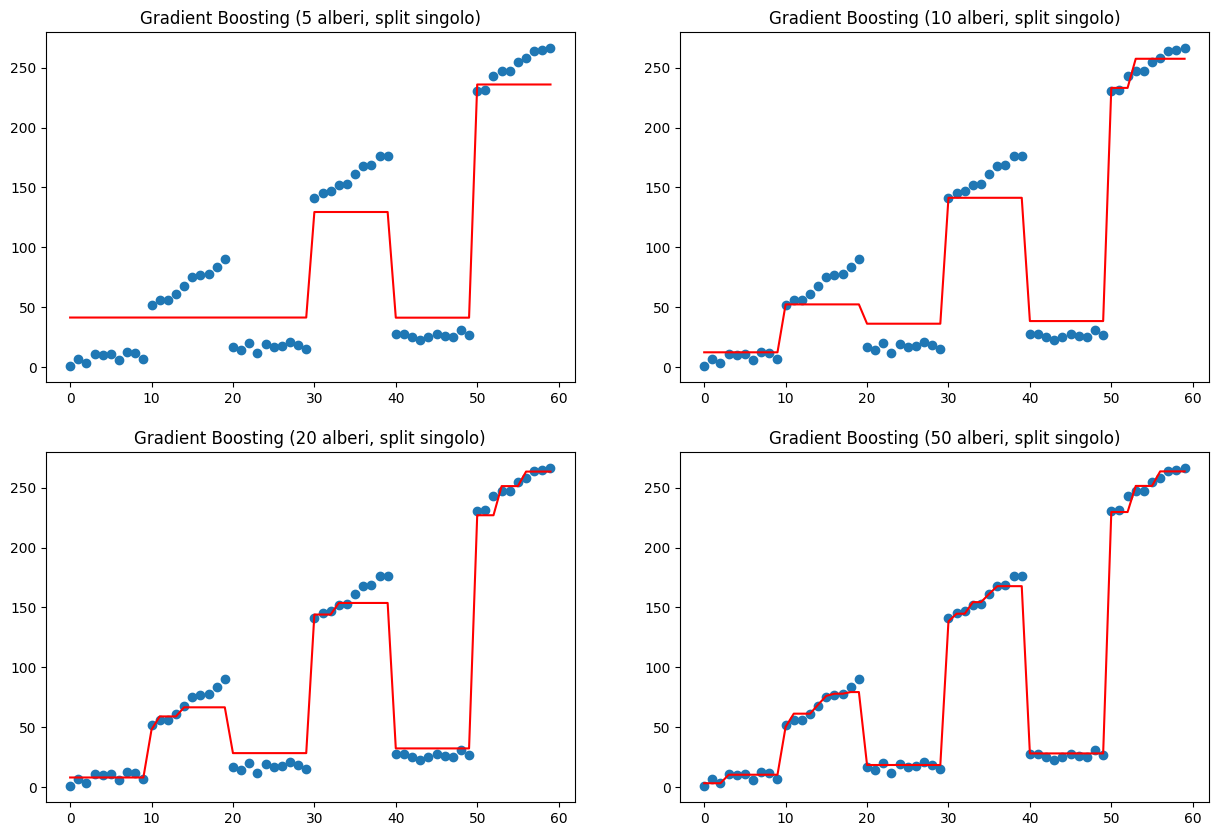

In [15]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))

for idx, n_estimators in enumerate([5, 10, 20, 50]):
    params['n_estimators'] = n_estimators

    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

    gradient_boosting_regressor.fit(x, y)
    subplot = ax[idx // 2][idx % 2]
    subplot.set_title('Gradient Boosting ({} alberi, split singolo)'.format(n_estimators))
    subplot.scatter(x, y)
    gb_predictions = gradient_boosting_regressor.predict(x)
    subplot.plot(x, gb_predictions, color='r')
plt.show()

#### Adesso utilizzo un Gradient Boosting con 5, 10, 20, 50 estimatore ma con profondita = 2

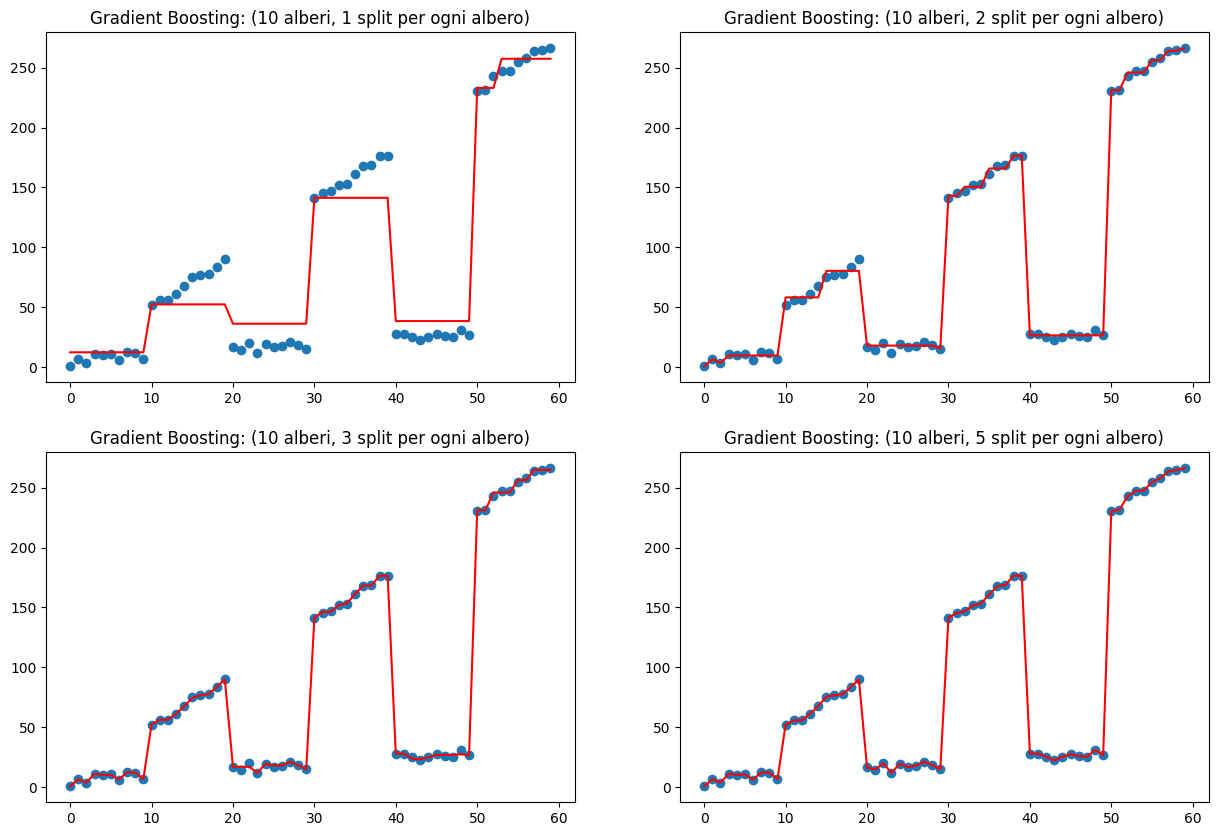

In [16]:
params['n_estimators'] = 10

f, ax = plt.subplots(2, 2, figsize=(15, 10))

for idx, max_depth in enumerate([1, 2, 3, 5]):
    params['max_depth'] = max_depth

    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

    gradient_boosting_regressor.fit(x, y)
    gb_predictions = gradient_boosting_regressor.predict(x)
    subplot = ax[idx // 2][idx % 2]
    subplot.set_title('Gradient Boosting: (10 alberi, {} split per ogni albero)'.format(max_depth))
    subplot.scatter(x, y)
    subplot.plot(x, gb_predictions, color='r')
plt.show()